In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### <div class="alert alert-info"> Above, find required imports per formatting best practices; expand cell below for information on Q1 - Q3.</div>

##### Exercise questions 1 - 3 relate to ex-Jupyter functions required for setup and are noted below for reference:

Q1. Create a 'data' folder in your local project repository. </br> 
Q2. Download these two CSV files and place them in the data folder: </br>  
&ensp; http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD </br>  
&emsp; - rename the file to `gdp_percapita.csv` </br>  
&ensp; Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H </br>  
&emsp; - rename the file to `internet_use.csv` </br>  
&ensp; Create a `notebooks` folder and launch a Jupyter Notebook in this folder.</br>  
Q3. Import the required packages with their customary aliases as follows: </br>  
    `import pandas as pd` </br>   
    `import numpy as np`  </br>  
    `import matplotlib.pyplot as plt`  </br>  
    `import seaborn as sns`

#### Q4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
#dataframe creation
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
#top and bottom row review
print (gdp_df.head(10))
print (gdp_df.tail(10))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN
5     Afghanistan  2016  2101.422187              NaN
6     Afghanistan  2015  2108.714173              NaN
7     Afghanistan  2014  2144.449634              NaN
8     Afghanistan  2013  2165.340915              NaN
9     Afghanistan  2012  2122.830759              NaN
     Country or Area  Year        Value  Value Footnotes
7652        Zimbabwe  1999  2866.032886              NaN
7653        Zimbabwe  1998  2931.725144              NaN
7654        Zimbabwe  1997  2896.147308              NaN
7655        Zimbabwe  1996  2867.026043              NaN
7656        Zimbabwe  1995  2641.378271              NaN
7657        Zimbabwe  1994  2670.106615              NaN
7658   

#### Q5. How many rows and columns are in gdp_df? What are the data types of each column?

In [34]:
#dataframe preview
print(gdp_df.info())
print(gdp_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB
None
Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


#### <div class="alert alert-info"> A5.</div>

  &ensp; SHAPE: </br>
    &emsp; 7662 rows; 4 columns
</br>
  &ensp; TYPE: </br>
    &emsp; Country or Area: object </br>
    &emsp; Year: int64 </br>
    &emsp; Value: float64 </br>
    &emsp; Value Footnotes: float64

#### Q6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
#Drop Value Footnotes
gdp_df = gdp_df.drop(columns=['Value Footnotes'])
#rename remaining columns
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value':'GDP_Per_Capita'})
# preview df
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


#### Q7. How many countries have data for all years? Which countries are missing many (at least one) years of data? Look at the number of observations per year. What do you notice?

In [6]:
#determine min year
min_year = gdp_df['Year'].min()

#determine max year
max_year = gdp_df['Year'].max()

#determine number of years in dataset
count_years = gdp_df['Year'].nunique()

#print header stats
print('Min Year: ' + str(min_year))
print('Max Year: ' + str(max_year))
print('Number of years in dataset: ' + str(count_years))

#find countries with years missing; year count by country
country_list = gdp_df.groupby('Country')["Country"].count().reset_index(name='year_count').sort_values(by='year_count')

#How many countries have data for all years?
count_countries_complete_data = len(country_list[country_list["year_count"] == count_years])
print("Count of countries with data for all years: " + str(count_countries_complete_data))

#Which countries are missing many (at least one) years of data?
countries_missing_data = country_list[country_list["year_count"] < count_years]
print("Countries missing data:") 
print(countries_missing_data)

# format for A7
# missing_data_list = countries_missing_data["Country"].tolist()
# print(missing_data_list)


Min Year: 1990
Max Year: 2022
Number of years in dataset: 33
Count of countries with data for all years: 202
Countries missing data:
                       Country  year_count
53                    Djibouti          10
197                    Somalia          10
225   Turks and Caicos Islands          12
192  Sint Maarten (Dutch part)          14
112                     Kosovo          15
36              Cayman Islands          16
154                      Nauru          19
0                  Afghanistan          20
47                    CuraÃ§ao          22
169                      Palau          22
213    SÃ£o TomÃ© and Principe          22
180                      Qatar          23
166         Other small states          23
219                Timor-Leste          23
124                    Liberia          23
125                      Libya          24
185                 San Marino          25
195               Small states          26
149                 Montenegro          26
135    

#### <div class="alert alert-info"> A7. </div>

How many countries have data for all years? </br>
A: 202 countries have data for all years. </br>
</br>
Which countries are missing many (at least one) years of data? </br>
A: 'Djibouti', 'Somalia', 'Turks and Caicos Islands', 'Sint Maarten (Dutch part)', 'Kosovo', 'Cayman Islands', 'Nauru', 'Afghanistan', 'CuraÃ§ao', 'Palau', 'SÃ£o TomÃ© and Principe', 'Qatar', 'Other small states', 'Timor-Leste', 'Liberia', 'Libya', 'San Marino', 'Small states', 'Montenegro', 'Maldives', 'Moldova', 'Israel', 'Iceland', 'Estonia', 'Croatia', 'Serbia', 'Slovenia', 'Lithuania', 'Latvia', 'West Bank and Gaza', 'Bosnia and Herzegovina', 'Cambodia', 'Kuwait', 'Slovak Republic', 'Turkmenistan', 'Lebanon', 'Tonga', 'Hungary', 'Aruba', 'Bhutan' </br>
</br>
What do you notice? </br>
A: Some of these entries, such as 'Sint Maarten (Dutch part)', 'CuraÃ§ao', and 'Other small states' seem to be poor country designations subject to varied grouping, data entry, and formatting errors.

#### Q8. Create some plots to show the distribution of GDP per capita for the year 2020. 
<ul>
<li> Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.</li> 
<li> Create a histogram, a density plot, a boxplot, and a violin plot. </li>
<li> What do you notice when you look at these plots? </li>
<li> How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?</li>
</ul>

C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


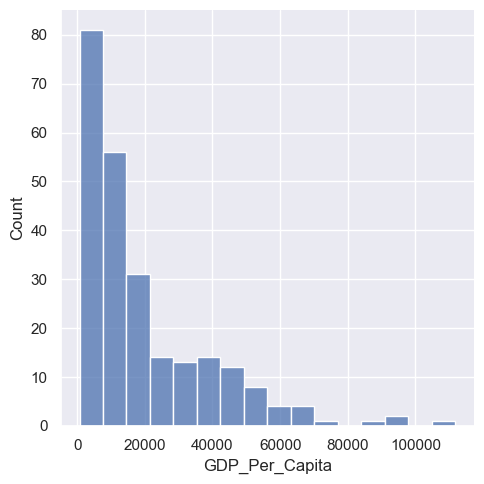

In [7]:
# Isolate data - GDP per capita for the year 2020

gdp_2020 = gdp_df[gdp_df["Year"] == 2020]

# Create a histogram
sns.displot(data=gdp_2020["GDP_Per_Capita"])

C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

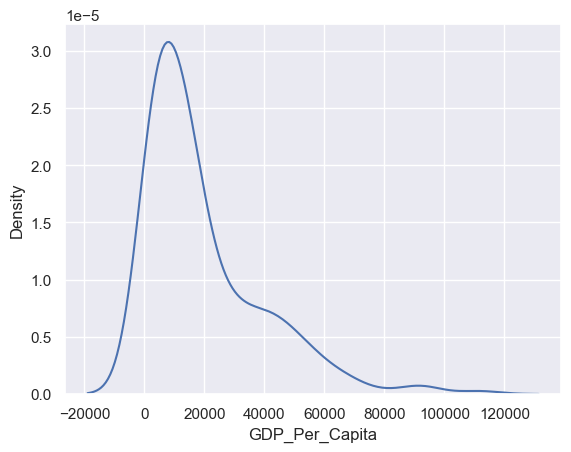

In [8]:
#create a density plot
sns.kdeplot(gdp_2020["GDP_Per_Capita"])


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

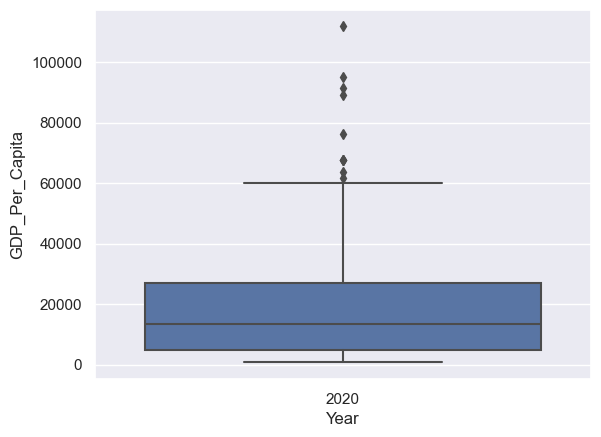

In [9]:
# Create a boxplot
sns.boxplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

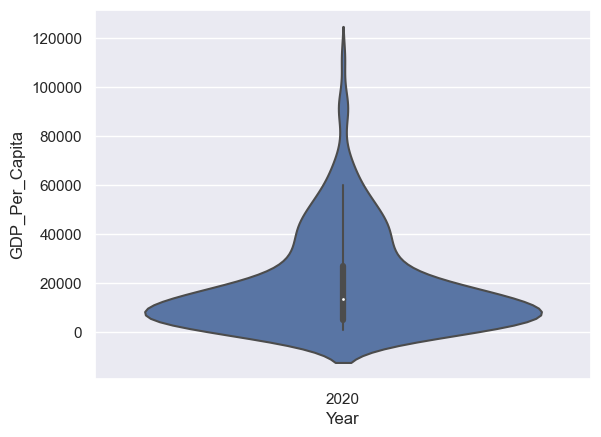

In [10]:
# Create a violin plot
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

#### <div class="alert alert-info"> A8. </div>


The plots visually convey various measures of 2020 GDP Per Capita data.  The histogram and boxplot are helpful in understanding the frequency and disribution of GDP per capita for the year.  The box and violin plots are less visually telling, but show measures of central tendancy for GDP Per Capita data for the year across all countries.

#### Q9. What was the median GDP per capita value in 2020?

In [11]:
med_gdp2020 = gdp_2020["GDP_Per_Capita"].median()
print(round((med_gdp2020), 2))

13358.0


#### <div class="alert alert-info"> A9. </div>
The median GDP per capita in 2020 was: 13,135.0

#### Q10. Create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
<ul>
	<li> A boxplot</li>
	<li> A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)</li>
	<li> A scatterplot</li>
	<li> A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)</li>
 </ul>
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

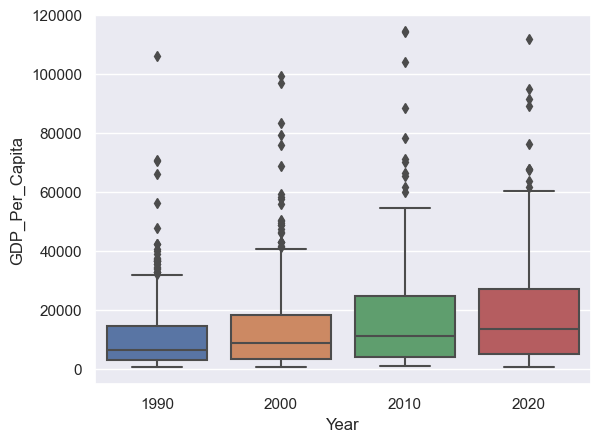

In [12]:
#subset data
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]

#boxplot
sns.boxplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

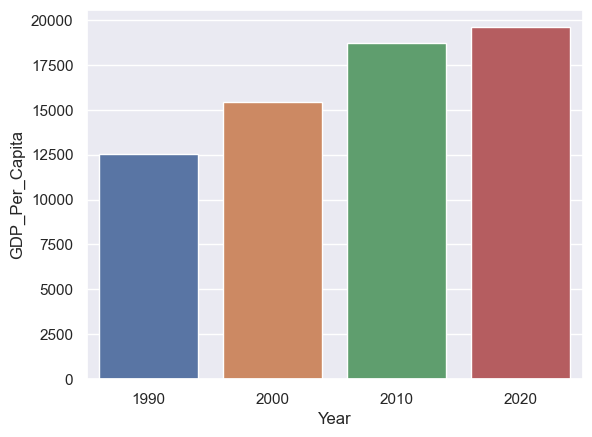

In [13]:
# barplot
sns.barplot(x="Year",
            y="GDP_Per_Capita",
            data=gdp_decades,
           errorbar=None)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

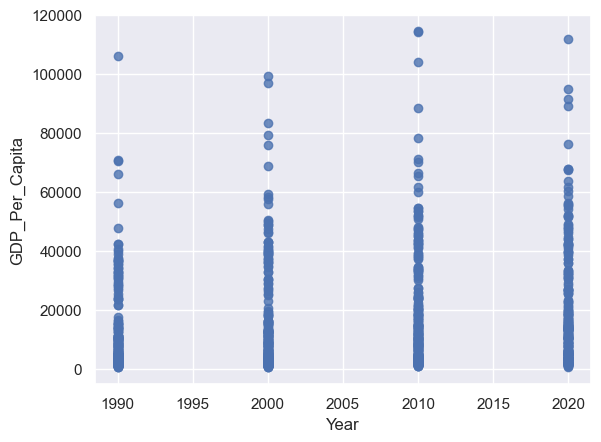

In [14]:
# scatterplot
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

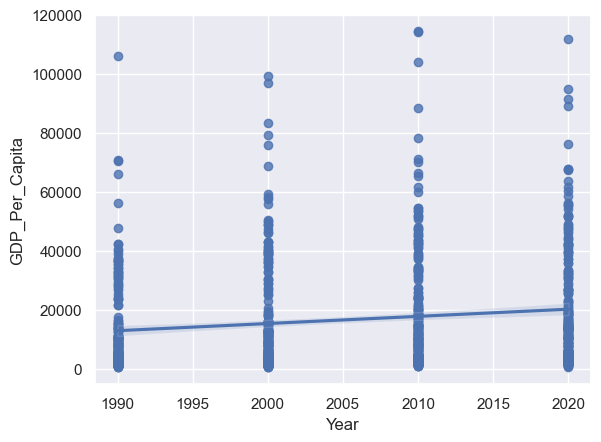

In [15]:
# scatterplot with trend line
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], fit_reg=True)

#### <div class="alert alert-info"> A10. </div> 
The graphs show GDP values have increased over time. The box and bar plots illustrate this best; the scatter plots are relatively useless because the data is not continuous, though the trendline on the final chart reinforces our findings.

#### Q11. Which country was the first to have a GDP per capita greater than $100,000?

In [16]:
#All countries with 100,000 GDP Per Capita
gdp_100k = gdp_df[gdp_df["GDP_Per_Capita"] > 100000]

#earliest year
min_year_100k = gdp_100k["Year"].min()

#country/countries
first_100k_gdp = gdp_100k[gdp_100k["Year"] == min_year_100k]

#answer
print(round(first_100k_gdp, 2))

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990       105893.63


#### <div class="alert alert-info"> A11. </div> 
United Arab Emirates was the first country to have a GDP Per Capita greater than 100,000 in the year 1990 with a GDP Per Capita of $105,893.63 

#### Q12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Country with the greatest GDP Per Capita in 2020:
         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751


C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Luxembourg GDP Per Capita Over Time')

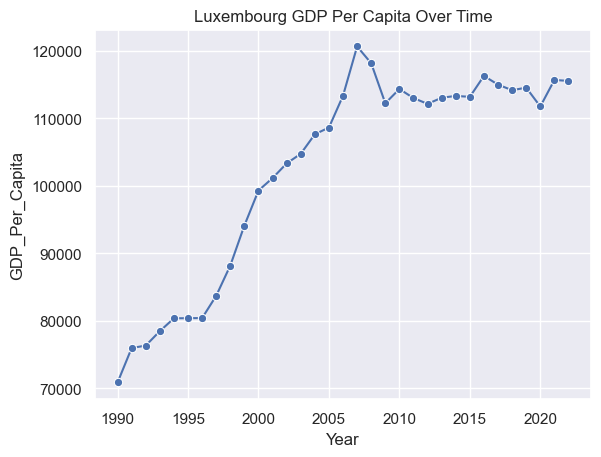

In [17]:
#Country with highest GDP Per Capita in 2020:
highest_gdp2020 = gdp_2020[gdp_2020["GDP_Per_Capita"] == gdp_2020["GDP_Per_Capita"].max()]
print("Country with the greatest GDP Per Capita in 2020:")
print(highest_gdp2020)

#source plot data
lux_all = gdp_df[gdp_df["Country"] == "Luxembourg"]

#plot
sns.lineplot(x='Year',
             y='GDP_Per_Capita',
             data=lux_all,
            marker='o').set_title('Luxembourg GDP Per Capita Over Time')

#### <div class="alert alert-info"> A12. </div> 
Luxembourg had the highest GDP Per Capita of 111,751.31 in 2020.  GDP Per Capita increased steadily until it peaked just above 120k in 2007, then fell to 115k and has remained consistent since.

#### Q13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

Country with the lowest GDP Per Capita in 2020:
     Country  Year  GDP_Per_Capita
973  Burundi  2020      711.355263


C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Burundi GDP Per Capita Over Time')

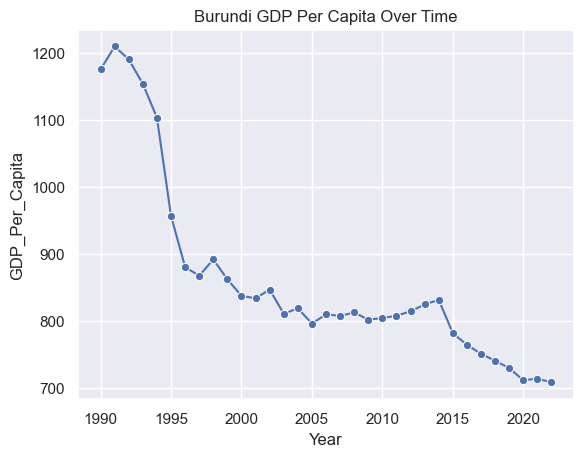

In [18]:
#Country with lowest GDP Per Capita in 2020:
lowest_gdp2020 = gdp_2020[gdp_2020["GDP_Per_Capita"] == gdp_2020["GDP_Per_Capita"].min()]
print("Country with the lowest GDP Per Capita in 2020:")
print(lowest_gdp2020)

#source plot data
bur_all = gdp_df[gdp_df["Country"] == "Burundi"]

#plot
sns.lineplot(x='Year',
             y='GDP_Per_Capita',
             data=bur_all,
            marker='o').set_title('Burundi GDP Per Capita Over Time')

#### <div class="alert alert-info"> A13. </div> 
Burundi had the lowest GDP Per Capita in 2020 at 711.36. Burundi's GDP Per Capita has decreased steadily since its peak of 1200 in 1991.

#### Q14.
Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [19]:
# import the source file which contains relevant data through line 4496; read in statement below accounts for zero indexing.
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)
#inspect top rows
print(internet_df.head())
#inspect bottom rows
print(internet_df.tail())

#dataset information
print(internet_df.info)
print(internet_df.dtypes)


  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN
<bound method DataFrame.info of      Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...           

#### <div class="alert alert-info"> A14. </div>

Top Rows:<br>
<code>  Country or Area  Year     Value  Value Footnotes 
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN</code>
<br>
Bottom Rows:<br>
<code>4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN</code>
<br>
Data Types<br>
<code>Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object
</code>

#### Q15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [20]:
#Drop Value Footnotes
internet_df = internet_df.drop(columns=['Value Footnotes'])
#rename remaining columns
internet_df = internet_df.rename(columns = {'Country or Area': 'Country', 'Year':'Year', 'Value':'Internet_Users_Pct'})
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


#### Q16. Look at the number of observations in this dataset per year. What do you notice?

In [21]:
# count of observations by year
year_count = internet_df.Year.value_counts()
print(year_count)

# examine earliest year
print(internet_df[internet_df.Year == 1960])

Year
1990    210
2011    207
2007    206
2008    204
2012    203
2010    203
2009    203
2014    202
2013    202
2002    202
2005    201
2001    201
2006    200
2000    199
2004    199
1999    198
2003    196
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1980      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1982      7
1981      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1960      7
Name: count, dtype: int64
       Country  Year  Internet_Users_Pct
533   Botswana  1960                 0.0
665    Burundi  1960                 0.0
1663   Grenada  1960                 0.0
2558  Maldives  1960                 0.0
3917     Syria  1960                 0.0
4018  Thailand  1960                 0.0
4073      Togo  1960                 0.0


#### <div class="alert alert-info"> A16. </div> 
There are seven observations in the years 1960 - 1980, prior to when the internet was invented. The values are 0.0.

#### Q17. What is the first year to have a non-zero internet users percentage value?

In [22]:
#assign a variable to a subset of internet_df that does not include zero values
nonzero_df = internet_df[internet_df.Internet_Users_Pct > 0]
# uncomment below to see revised count of new subset
# print(nonzero_df.Year.value_counts())

#print min year
print(nonzero_df.Year.min())

1990


#### 1990 is the earliest year wherein internet users percentage was not zero.

#### How does the distribution of internet users percent differ for 2000 and 2014?

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

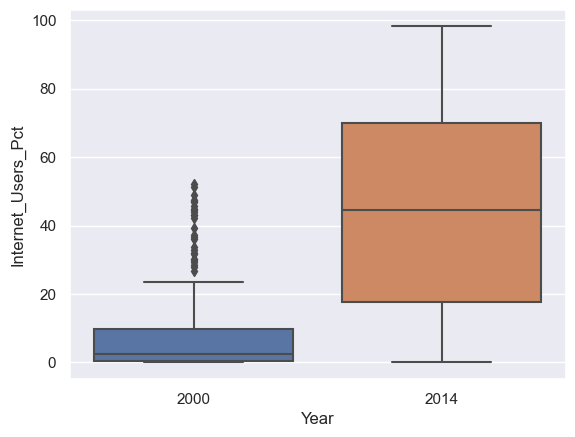

In [23]:
# isolate data
dist_comp = internet_df[internet_df.Year.isin([2000, 2014])]

# create a histogram

sns.boxplot(data=dist_comp, x="Year", y="Internet_Users_Pct")


#### <div class="alert alert-info"> A18. </div> 
The boxplot illustrates the differences in the distribution of percentage of internet users between the years 2000 and 2014 by visualizing the increase in all measures of central tendency for users in 2014.  The increased average and median can support hypotheses that internet usage reporting was catching up to the rate at which new users in countries began adopting internet usage.

#### Q19. For how many countries was the percentage of internet users below 5% in 2014?

In [24]:
#subset 2014 internet_df entries where the Year is 2014 and the percentage of internet users is less than 5%
sub5_countries_2014 = internet_df[(internet_df.Year == 2014) & (internet_df.Internet_Users_Pct < 5)]
# uncomment line below to preview results
# print(sub5_countries_2014)

#count the number of countries in the new df.  there should only be one entry per country, but I used a distinct count for good meansure.
count_countries = sub5_countries_2014.Country.nunique()
print("Number of countries with an internet user percentage below 5% in 2014: " + str(count_countries))


Number of countries with an internet user percentage below 5% in 2014: 16


#### <div class="alert alert-info"> A19. </div> 
16 countries had in internet user percentage below 5% in 2014.

#### Q20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [25]:
# uncomment lines below to check original df shapes
# print(gdp_df.shape)
# print(internet_df.shape)

# print(gdp_df.Year.max())
# print(internet_df.Year.max())

# print(gdp_df.Country.nunique())
# print(internet_df.Country.nunique())

# create and view df
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how="outer", on=["Country", "Year"])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
8731,Yemen,1999,NaN,0.056629
8732,Yemen,1998,NaN,0.023323
8733,Yemen,1997,NaN,0.015025
8734,Yemen,1996,NaN,0.000621


#### Q21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
2993  Iceland  2014    50450.741612               98.16
687   Bermuda  2014    77361.104881               96.80
5212   Norway  2014    62838.515727               96.30
      Country  Year  GDP_Per_Capita  Internet_Users_Pct
679   Bermuda  2022    81165.650944                 NaN
680   Bermuda  2021    78570.489515                 NaN
681   Bermuda  2020    76117.804744                 NaN
682   Bermuda  2019    81681.726668                 NaN
683   Bermuda  2018    81423.408453                 NaN
...       ...   ...             ...                 ...
8172  Iceland  1994             NaN            6.794812
8173  Iceland  1993             NaN            2.667825
8174  Iceland  1992             NaN            1.539160
8175  Iceland  1991             NaN            0.505129
8176  Iceland  1990             NaN            0.000000

[99 rows x 4 columns]


C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hayle\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

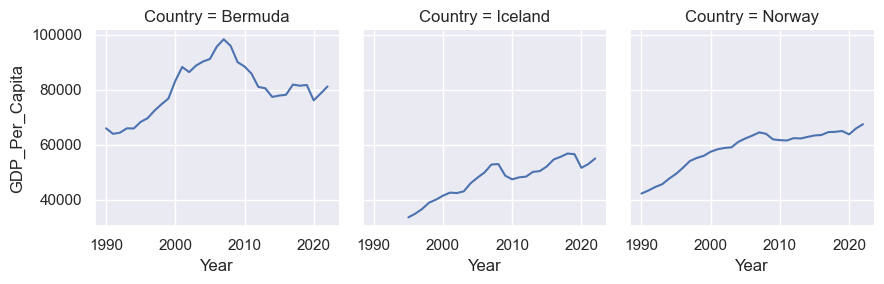

In [26]:
# find top 3 countries in 2014
usage_2014_top3 = (gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014].nlargest(3, ["Internet_Users_Pct"]))
print(usage_2014_top3)

# subset data for Iceland, Bermuda, and Norway (hardcoded)
# all_years_top3hard = gdp_and_internet_use[gdp_and_internet_use.Country.isin(["Iceland", "Bermuda", "Norway"])]
# print(all_years_top3hard)

# subset data for Iceland, Bermuda, and Norway (subquery, but python)
all_years_top3 = gdp_and_internet_use[gdp_and_internet_use.Country.isin(usage_2014_top3.Country)]
print(all_years_top3)

# plot the new df
fg = sns.FacetGrid(all_years_top3, col="Country")
fg.map_dataframe(sns.lineplot, x="Year", y="GDP_Per_Capita")


#### <div class="alert alert-info"> A21. </div> 
All three countries showed an increase in GDP per capita from 1990 to 2022. Bermuda's GDP was the most volatile, and Norway was most steady implying it's well insulated against global economic trends.  Bermuda consistantly had the greatest GDP percapita.

#### Q22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [27]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use.Year == 2014]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2014,2144.449634,6.39
28,Africa Eastern and Southern,2014,3642.875373,NaN
61,Africa Western and Central,2014,4146.994622,NaN
94,Albania,2014,11586.817446,60.10
127,Algeria,2014,11561.259795,18.09
...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06
8647,Turkey,2014,NaN,51.04
8670,Venezuela,2014,NaN,57.00
8694,Virgin Islands (U.S.),2014,NaN,50.07


#### Q23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.


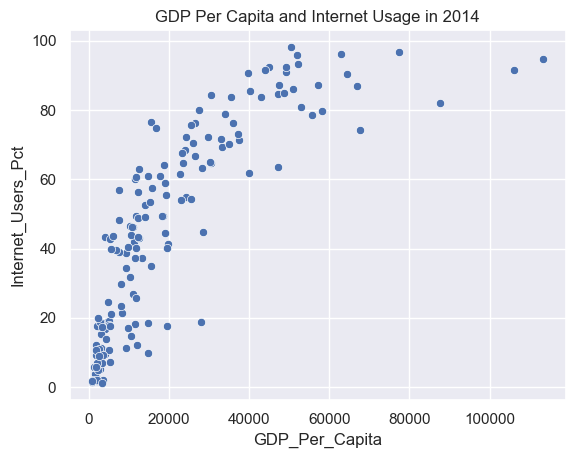

In [28]:
# count number of countries
# gdp_and_internet_use_2014.Country.nunique()

fg2 = sns.scatterplot(data=gdp_and_internet_use_2014, x="GDP_Per_Capita", y="Internet_Users_Pct").set(title="GDP Per Capita and Internet Usage in 2014")

#### <div class="alert alert-info"> A23. </div> 
The plot shows that there's a positive correlation between a country's internet use and its GDP for the year 2014.  It's difficult to understand which points correlate to which country, and this chart really only shows a trend in the overall comparable data points.

#### Q24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [29]:
# create gdp_per_capita_2014
gdp_per_capita_2014 = (gdp_and_internet_use[gdp_and_internet_use.Year == 2014])

# create the qcut column
qcut_assessment = pd.qcut(gdp_per_capita_2014.GDP_Per_Capita, 3, labels=["Low", "Medium", "High"])

# add qcut column to df
gdp_per_capita_2014["GDP_group"] = qcut_assessment
gdp_per_capita_2014

C:\Users\hayle\AppData\Local\Temp\ipykernel_23496\608273579.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita_2014["GDP_group"] = qcut_assessment


,Country,Year,GDP_Per_Capita,Internet_Users_Pct,GDP_group
7,Afghanistan,2014,2144.449634,6.39,Low
28,Africa Eastern and Southern,2014,3642.875373,NaN,Low
61,Africa Western and Central,2014,4146.994622,NaN,Low
94,Albania,2014,11586.817446,60.10,Medium
127,Algeria,2014,11561.259795,18.09,Medium
...,...,...,...,...,...
8589,T.F.Y.R. Macedonia,2014,NaN,68.06,NaN
8647,Turkey,2014,NaN,51.04,NaN
8670,Venezuela,2014,NaN,57.00,NaN
8694,Virgin Islands (U.S.),2014,NaN,50.07,NaN


#### Q25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?

In [30]:
print(gdp_per_capita_2014.groupby("GDP_group").Internet_Users_Pct.agg("median"))

GDP_group
Low       10.6
Medium    43.4
High      78.7
Name: Internet_Users_Pct, dtype: float64


C:\Users\hayle\AppData\Local\Temp\ipykernel_23496\3960154856.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(gdp_per_capita_2014.groupby("GDP_group").Internet_Users_Pct.agg("median"))


#### <div class="alert alert-info"> A25. </div>
<code>Low       10.6
Medium    43.4
High      78.7</code>